# **Цыганов Никита, М-20-ИВТ 3**
# Как выглядит MobileNetV2?

## Основной строительный блок этой сети в целом похож на предыдущее поколение, но имеет ряд ключевых особенностей.

## Как и в MobileNetV1, здесь есть сверточные блоки с шагом 1 (на рисунке слева) и с шагом 2 (на рисунке справа). Блоки с шагом 2 предназначены для снижения пространственной размерности тензора и, в отличие от блока с шагом 1, не имеют остаточных связей.
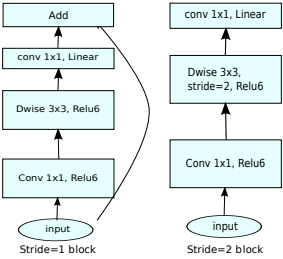


## Вводятся два типа строительных блоков:
## – Блок с шагом 1 (Stride=1 block) – инвертированный
## остаточный блок (inverted residual block or bottleneck block)
## – Блок с шагом 2 (Stride=2 block) – последовательность сверточных слоев, снижающих размер карты признаков
## Каждый блок содержит 3 сверточных слоя:
## – Свертка с ядром 1x1 и функция активации ReLU
## – Пространственная свертка (depthwise convolution)
#  – Свертка с ядром 1x1


##Блок MobileNet, называемый авторами расширяющим сверточным блоком (в оригинале expansion convolution block или bottleneck convolution block with expansion layer), состоит из трёх слоёв:

##Сначала идёт pointwise convolution с большим количеством каналов, называемый expansion layer.

##На входе этот слой принимает тензор размерности $D_f * D_f * C_{in}$, а на выходе выдает тензор $D_f * D_f * (t*C_{in})$, где $t$ — новый гиперпараметр, названный уровнем расширения (в оригинале expansion factor). Авторы рекомендуют задавать этому гиперпараметру значение от 5 до 10, где меньшие значения лучше работают для более маленьких сетей, а большие — для более крупных (в самой статье во всех экспериментах принимается $t = 6$).

##Этот слой создает отображение входного тензора в пространстве большой размерности. Авторы называют такое отображение «целевым многообразием» (в оригинале «manifold of interest»)
## Затем идёт depthwise convolution с ReLU6-активацией. Этот слой вместе с предыдущим по сути образует строительный блок MobileNetV1.

## На входе этот слой принимает тензор размерности $D_f * D_f * (t*C_{in})$, а на выходе выдает тензор $(D_f/s) * (D_f/s) * (t*C_{in})$, где $s$ — шаг свертки (stride), ведь как мы помним, depthwise convolution не меняет число каналов.
## В конце идёт 1х1-свертка с линейной функцией активации, понижающая число каналов. Авторы статьи выдвигают гипотезу, что «целевое многообразие» высокой размерности, полученное после предыдущих шагов, можно «уложить» в подпространство меньшей размерности без потери полезной информации, что, собственно и делается на этом шаге (как можно увидеть по экспериментальным результатам, эта гипотеза полностью оправдывается).

## На входе такой слой принимает тензор размерности $(D_f/s) * (D_f/s) * (t*C_{in})$, а на выходе выдает тензор $(D_f/s) * (D_f/s) * C_{out}$, где $C_{out}$ — количество каналов на выходе блока.
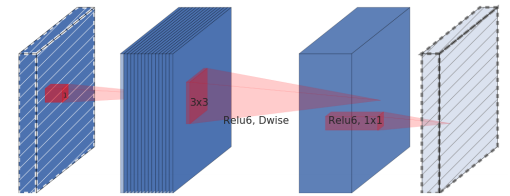

## Фактически, именно третий слой в этом блоке, называемый bottleneck layer, и является основным отличием второго поколения MobileNet от первого.


# Практические результаты

## Сравним между собой несколько архитектур сетей. Возьмем для примера Xception, глубокую и старую VGG16, а также несколько вариаций MobileNet.

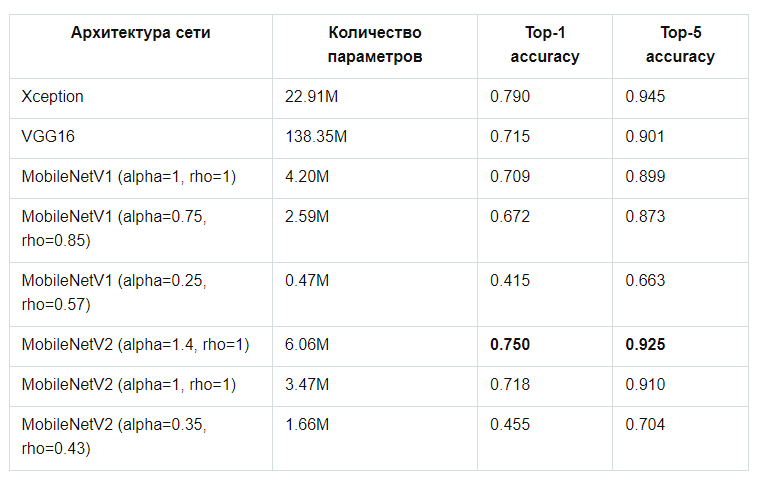

## Самым большим достижением из этих экспериментов то, что сейчас сети, способные работать на мобильных устройствах, показывают accuracy выше, чем у VGG16.

## Также, в статье про MobileNetV2 показываются весьма интересные результаты на других задачах. В частности, авторы демонстрируют, что SSDLite-архитектура для задачи object detection, использующая MobileNetV2 в свёрточной части, превосходит известный детектор реального времени YOLOv2 по точности на датасете MS COCO, при этом показывая в 20 раз большую скорость и в 10 раз меньший размер (в частности, на смартфоне Google Pixel сеть MobileNetV2 позволяет делать object detection с 5 FPS).

## Дальнейшее использование

## С MobileNetV2 мобильные разработчики получили почти неограниченный инструментарий в области компьютерного зрения — помимо относительно простых моделей для классификации изображений, теперь можно использовать прямо на мобильном устройстве алгоритмы детектирования объектов и семантической сегментации.

## При этом использовать MobileNet с помощью Keras и TensorFlow настолько просто, что в принципе разработчики могут делать это, даже не углубляясь во внутреннее устройство алгоритмов.

# Пример:

In [ ]:
# Удаление всех файлов из /content
!rm -rf *

In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!curl -L "https://public.roboflow.com/ds/mkMhFTVaqs?key=P55HgLGRNO" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%cd /content/
%mkdir images/
%mv train images/train
%mv test images/test
%mv valid images/valid

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   889  100   889    0     0   1280      0 --:--:-- --:--:-- --:--:--  1280
100 60.9M  100 60.9M    0     0  59.0M      0  0:00:01  0:00:01 --:--:--  258M
Archive:  roboflow.zip
 extracting: test/daisy/3699235066_fc09a02dfe_m_jpg.rf.083993c3ebd5cfdb89aef2abc23535fa.jpg  
 extracting: test/daisy/2579018590_74359dcf1a_m_jpg.rf.09c66018bd90f02891f966ce3d0c4c47.jpg  
 extracting: test/dandelion/3554435478_1a7ab743e9_n_jpg.rf.07d5667ff8bfd641e5004f6b2270d4b6.jpg  
 extracting: test/dandelion/34587720941_ccbbc420ec_n_jpg.rf.0adc605a005797e5ef3c26bd4c7078f9.jpg  
 extracting: test/daisy/22244161124_53e457bb66_n_jpg.rf.0647dd5bf7e8b1493bf4ab1aabe2df3e.jpg  
 extracting: test/daisy/6207492986_0ff91f3296_jpg.rf.03fc13bc6c049b950ab318b108e0283d.jpg  
 extracting: test/dandelion/8797114213_103535743c_m_jpg.rf.132646214f7e9bcbdda402ab688ca8

In [ ]:
# Превращаем этот набор данных в формат набора данных Tensorflow
import tensorflow_datasets as tfds
builder = tfds.folder_dataset.ImageFolder('images/')
print(builder.info)
raw_train = builder.as_dataset(split='train', shuffle_files=True)
raw_test = builder.as_dataset(split='test', shuffle_files=True)
raw_valid = builder.as_dataset(split='valid', shuffle_files=True)

tfds.core.DatasetInfo(
    name='image_folder',
    version=1.0.0,
    description='Generic image classification dataset.',
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1821,
    splits={
        'test': 182,
        'train': 1275,
        'valid': 364,
    },
    supervised_keys=('image', 'label'),
    citation="""""",
    redistribution_info=,
)



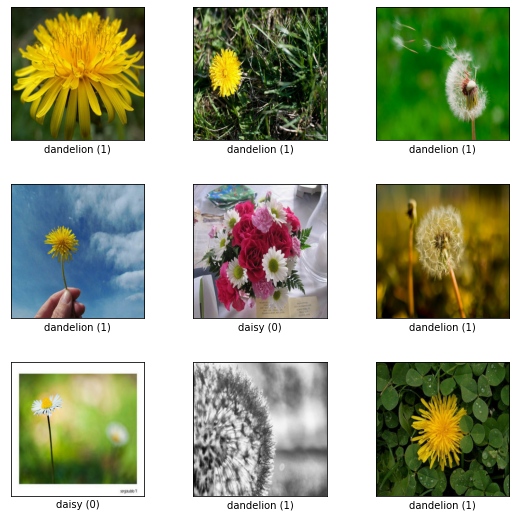

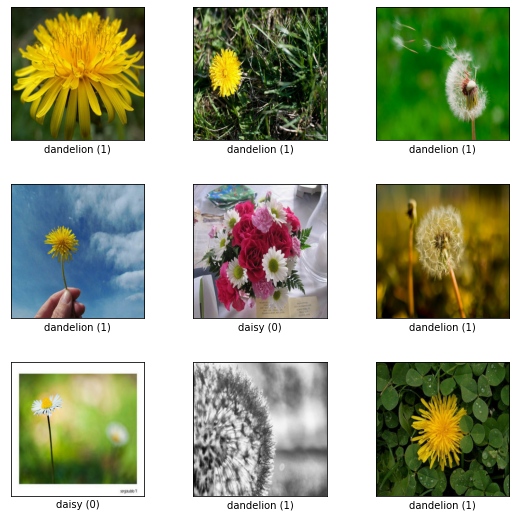

In [ ]:
# Изображения и метки из обучающего набора
tfds.show_examples(raw_train, builder.info)

In [ ]:
IMG_SIZE = 160 # Изменяем размер изображений на 160х160

def format_example(pair):
  image, label = pair['image'], pair['label']
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
train = raw_train.map(format_example)
validation = raw_valid.map(format_example)
test = raw_test.map(format_example)

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Создаём базовую модель из предварительно обученной модели MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False)

## Преобразуем каждое изображение 160x160x3 в блок функций 5x5x1280

In [ ]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [ ]:
base_model.trainable = False

# Архитектура базовой модели
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_35 (InputLayer)          [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_35[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_22  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_22 (Dense)            (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


2,5 млн параметров в MobileNet заморожены, но есть 1,2 тысяч обучаемых параметров в слое Dense. Они разделены между двумя tf.Variable объектами, весами и смещениями, что видно ниже

In [ ]:
len(model.trainable_variables)

2

In [ ]:
initial_epochs = 5
validation_steps= 5

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

5/5 [==============================] - 4s 471ms/step - loss: 0.8809 - accuracy: 0.3875


In [ ]:
# Loss - потеря, accuracy - точность
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.88
initial accuracy: 0.39


In [ ]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
40/40 [==============================] - 26s 534ms/step - loss: 0.7482 - accuracy: 0.4761 - val_loss: 0.6918 - val_accuracy: 0.5632
Epoch 2/5
40/40 [==============================] - 24s 533ms/step - loss: 0.6231 - accuracy: 0.6478 - val_loss: 0.5866 - val_accuracy: 0.7005
Epoch 3/5
40/40 [==============================] - 24s 533ms/step - loss: 0.5349 - accuracy: 0.7412 - val_loss: 0.5051 - val_accuracy: 0.7610
Epoch 4/5
40/40 [==============================] - 24s 535ms/step - loss: 0.4682 - accuracy: 0.7804 - val_loss: 0.4447 - val_accuracy: 0.8104
Epoch 5/5
40/40 [==============================] - 24s 535ms/step - loss: 0.4166 - accuracy: 0.8008 - val_loss: 0.3988 - val_accuracy: 0.8187


# Кривые обучения
## Ниже представлены кривые обучения точности/потери обучения и проверки при использовании базовой модели MobileNet V2 в качестве экстрактора фиксированных функций.

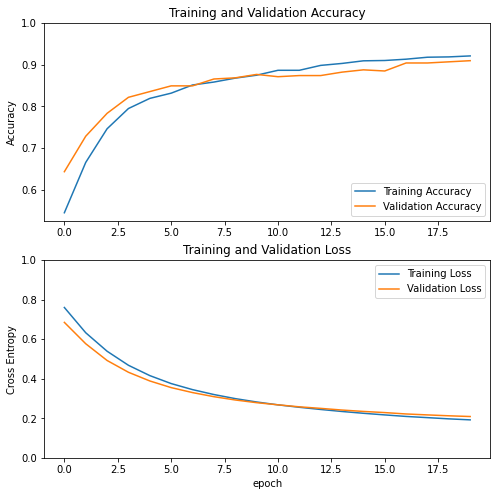

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Тонкая настройка
## В эксперименте по извлечению признаков тренировались только несколько слоев поверх базовой модели MobileNet V2. Веса предварительно обученной сети не обновлялись во время обучения.

## Один из способов еще больше повысить производительность - обучить (или «точно настроить») веса верхних слоев предварительно обученной модели вместе с обучением добавленного пользователем классификатора. В процессе обучения веса будут настроены с общих карт объектов на объекты, связанные специально с набором данных.

## Примечание. Это следует предпринимать только после обучения классификатора верхнего уровня с предварительно обученной моделью, установленной на необучаемую. Если добавить случайно инициализированный классификатор поверх предварительно обученной модели и попытаться обучить все слои вместе, величина обновлений градиента будет слишком большой (из-за случайных весов классификатора), и  предварительно обученная модель может забыть то, что знала до этого.

## Кроме того, следует попытаться настроить небольшое количество верхних уровней, а не всю модель MobileNet. В большинстве сверточных сетей чем выше уровень, тем он более специализирован. Первые несколько слоев изучают очень простые и общие функции, которые распространяются практически на все типы изображений. По мере того,подъёма, функции становятся все более специфичными для набора данных, на котором была обучена модель. Цель точной настройки - адаптировать эти специализированные функции для работы с новым набором данных, а не перезаписывать общее обучение.

## Все, что нужно сделать, это разморозить base_model и сделать нижние слои недоступными для обучения. Затем следует перекомпилировать модель (необходимо, чтобы эти изменения вступили в силу) и возобновить обучение.

In [ ]:
base_model.trainable = True

In [ ]:
# Число слоёв в базовой модели:
print("Number of layers in the base model: ", len(base_model.layers))

# Зададим точную настройку, начиная с этого слоя
fine_tune_at = 100

# Замораживаем все слои перед слоем `fine_tune_at`
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [ ]:
# Скомпилируем модель, используя гораздо более низкую скорость обучения.
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,862,721
Non-trainable params: 396,544
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

56

## Продолжаем обучать модель

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=validation_batches)

Epoch 20/30
40/40 [==============================] - 46s 983ms/step - loss: 0.2669 - accuracy: 0.8871 - val_loss: 0.1832 - val_accuracy: 0.9093
Epoch 21/30
40/40 [==============================] - 41s 955ms/step - loss: 0.1952 - accuracy: 0.9239 - val_loss: 0.1690 - val_accuracy: 0.9148
Epoch 22/30
40/40 [==============================] - 41s 968ms/step - loss: 0.1620 - accuracy: 0.9459 - val_loss: 0.1592 - val_accuracy: 0.9176
Epoch 23/30
40/40 [==============================] - 42s 987ms/step - loss: 0.1267 - accuracy: 0.9616 - val_loss: 0.1499 - val_accuracy: 0.9203
Epoch 24/30
40/40 [==============================] - 44s 1s/step - loss: 0.0942 - accuracy: 0.9765 - val_loss: 0.1439 - val_accuracy: 0.9231
Epoch 25/30
40/40 [==============================] - 42s 1s/step - loss: 0.0797 - accuracy: 0.9788 - val_loss: 0.1384 - val_accuracy: 0.9258
Epoch 26/30
40/40 [==============================] - 42s 1s/step - loss: 0.0677 - accuracy: 0.9882 - val_loss: 0.1315 - val_accuracy: 0.9341
E

##После точной настройки модель достигает точности 98%.

## Посмотрим на кривые обучения точности/потери обучения и проверки при тонкой настройке последних нескольких уровней базовой модели MobileNet V2 и обучении классификатора поверх нее. Потеря проверки намного выше, чем потеря тренировки, поэтому есть шанс получить некоторое переобучение.

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

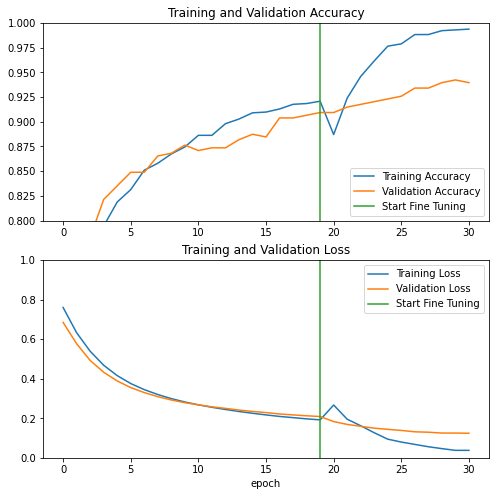

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Тест сети:

Text(0.5, 1.0, 'Dandelion')

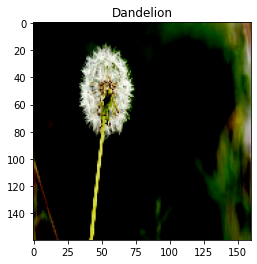

In [ ]:
test_batches = test.batch(1)
for image, label in test_batches.take(1):
  pass
plt.imshow(np.squeeze(image))

plt.title("Dandelion" if model.predict(image) > 0 else "Daisy")

# Вывод:
## **Использование предварительно обученной модели для извлечения признаков:** при работе с небольшим набором данных обычной практикой является использование возможностей, изученных моделью, обученной на более крупном наборе данных в том же домене. Это делается путем создания экземпляра предварительно обученной модели и добавления полностью подключенного классификатора сверху. Предварительно обученная модель «заморожена», и во время обучения обновляются только веса классификатора. В этом случае сверточная база извлекла все функции, связанные с каждым изображением.

## **Точная настройка предварительно обученной модели:** для дальнейшего повышения производительности можно переназначить верхние уровни предварительно обученных моделей для нового набора данных с помощью тонкой настройки. В этом случае были настроили свои веса таким образом, чтобы модель изучила высокоуровневые функции, характерные для набора данных. Этот метод обычно рекомендуется, когда обучающий набор данных большой и очень похож на исходный набор данных, на котором была обучена предварительно обученная модель.

# **Собственная реализация**
## Каждая строка описывает последовательность из 1 или более идентичных (по модулю шага) слоев, повторенных n раз. Все слои в одной и той же последовательности имеют одинаковое количество выходных каналов c. Первый слой каждой последовательности имеет шаг s, а все остальные используют шаг 1. Все пространственные свертки используют ядра 3 X 3. Коэффициент расширения t всегда применяется к входному размеру.
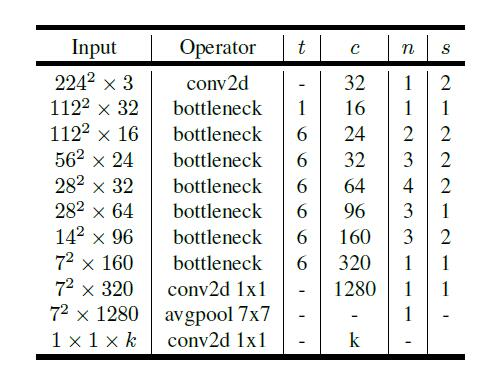

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!curl -L "https://public.roboflow.com/ds/mkMhFTVaqs?key=P55HgLGRNO" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%cd /content/
%mkdir images/
%mv train images/train
%mv test images/test
%mv valid images/valid

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   889  100   889    0     0    875      0  0:00:01  0:00:01 --:--:--   875
100 60.9M  100 60.9M    0     0  13.3M      0  0:00:04  0:00:04 --:--:-- 17.3M
Archive:  roboflow.zip
 extracting: test/daisy/3699235066_fc09a02dfe_m_jpg.rf.083993c3ebd5cfdb89aef2abc23535fa.jpg  
 extracting: test/daisy/2579018590_74359dcf1a_m_jpg.rf.09c66018bd90f02891f966ce3d0c4c47.jpg  
 extracting: test/dandelion/3554435478_1a7ab743e9_n_jpg.rf.07d5667ff8bfd641e5004f6b2270d4b6.jpg  
 extracting: test/dandelion/34587720941_ccbbc420ec_n_jpg.rf.0adc605a005797e5ef3c26bd4c7078f9.jpg  
 extracting: test/daisy/22244161124_53e457bb66_n_jpg.rf.0647dd5bf7e8b1493bf4ab1aabe2df3e.jpg  
 extracting: test/daisy/6207492986_0ff91f3296_jpg.rf.03fc13bc6c049b950ab318b108e0283d.jpg  
 extracting: test/dandelion/8797114213_103535743c_m_jpg.rf.132646214f7e9bcbdda402ab688ca8

In [3]:
# Превращаем этот набор данных в формат набора данных Tensorflow
import tensorflow_datasets as tfds
builder = tfds.folder_dataset.ImageFolder('images/')
print(builder.info)
raw_train = builder.as_dataset(split='train', shuffle_files=True)
raw_test = builder.as_dataset(split='test', shuffle_files=True)
raw_valid = builder.as_dataset(split='valid', shuffle_files=True)

tfds.core.DatasetInfo(
    name='image_folder',
    version=1.0.0,
    description='Generic image classification dataset.',
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1821,
    splits={
        'test': 182,
        'train': 1275,
        'valid': 364,
    },
    supervised_keys=('image', 'label'),
    citation="""""",
    redistribution_info=,
)



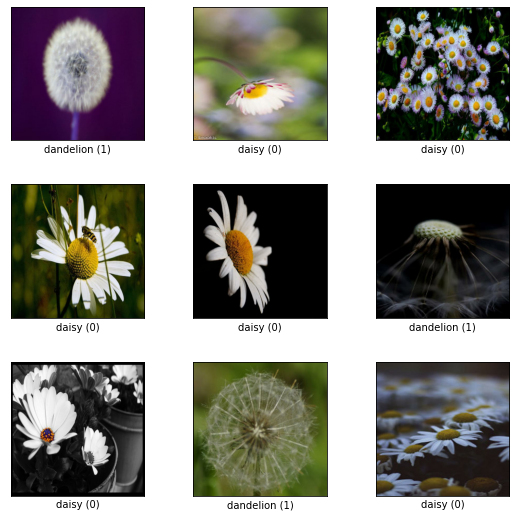

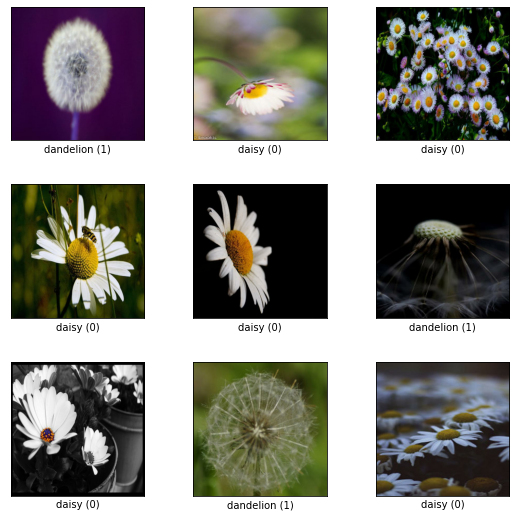

In [4]:
# Изображения и метки из обучающего набора
tfds.show_examples(raw_train, builder.info)

In [5]:
IMG_SIZE = 160 # Изменяем размер изображений на 160х160

def format_example(pair):
  image, label = pair['image'], pair['label']
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [6]:
train = raw_train.map(format_example)
validation = raw_valid.map(format_example)
test = raw_test.map(format_example)

In [7]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [11]:
from keras import backend
from keras.applications import imagenet_utils
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils
import tensorflow.compat.v2 as tf
from tensorflow.python.platform import tf_logging as logging
from tensorflow.python.util.tf_export import keras_export

BASE_WEIGHT_PATH = ('https://storage.googleapis.com/tensorflow/'
                    'keras-applications/mobilenet_v2/')
layers = None

def MobileNetV2(input_shape=None,
                alpha=1.0,
                include_top=True,
                weights='imagenet',
                input_tensor=None,
                pooling=None,
                classes=1000,
                classifier_activation='softmax',
                **kwargs):
  """Instantiates the MobileNetV2 architecture.
  MobileNetV2 is very similar to the original MobileNet,
  except that it uses inverted residual blocks with
  bottlenecking features. It has a drastically lower
  parameter count than the original MobileNet.
  MobileNets support any input size greater
  than 32 x 32, with larger image sizes
  offering better performance.
  Reference:
  - [MobileNetV2: Inverted Residuals and Linear Bottlenecks](
      https://arxiv.org/abs/1801.04381) (CVPR 2018)
  This function returns a Keras image classification model,
  optionally loaded with weights pre-trained on ImageNet.
  For image classification use cases, see
  [this page for detailed examples](
    https://keras.io/api/applications/#usage-examples-for-image-classification-models).
  For transfer learning use cases, make sure to read the
  [guide to transfer learning & fine-tuning](
    https://keras.io/guides/transfer_learning/).
  Note: each Keras Application expects a specific kind of input preprocessing.
  For MobileNetV2, call `tf.keras.applications.mobilenet_v2.preprocess_input`
  on your inputs before passing them to the model.
  `mobilenet_v2.preprocess_input` will scale input pixels between -1 and 1.
  Args:
    input_shape: Optional shape tuple, to be specified if you would
      like to use a model with an input image resolution that is not
      (224, 224, 3).
      It should have exactly 3 inputs channels (224, 224, 3).
      You can also omit this option if you would like
      to infer input_shape from an input_tensor.
      If you choose to include both input_tensor and input_shape then
      input_shape will be used if they match, if the shapes
      do not match then we will throw an error.
      E.g. `(160, 160, 3)` would be one valid value.
    alpha: Float, larger than zero, controls the width of the network. This is
      known as the width multiplier in the MobileNetV2 paper, but the name is
      kept for consistency with `applications.MobileNetV1` model in Keras.
      - If `alpha` < 1.0, proportionally decreases the number
          of filters in each layer.
      - If `alpha` > 1.0, proportionally increases the number
          of filters in each layer.
      - If `alpha` = 1.0, default number of filters from the paper
          are used at each layer.
    include_top: Boolean, whether to include the fully-connected layer at the
      top of the network. Defaults to `True`.
    weights: String, one of `None` (random initialization), 'imagenet'
      (pre-training on ImageNet), or the path to the weights file to be loaded.
    input_tensor: Optional Keras tensor (i.e. output of `layers.Input()`)
      to use as image input for the model.
    pooling: String, optional pooling mode for feature extraction when
      `include_top` is `False`.
      - `None` means that the output of the model
          will be the 4D tensor output of the
          last convolutional block.
      - `avg` means that global average pooling
          will be applied to the output of the
          last convolutional block, and thus
          the output of the model will be a
          2D tensor.
      - `max` means that global max pooling will
          be applied.
    classes: Optional integer number of classes to classify images into, only to
      be specified if `include_top` is True, and if no `weights` argument is
      specified.
    classifier_activation: A `str` or callable. The activation function to use
      on the "top" layer. Ignored unless `include_top=True`. Set
      `classifier_activation=None` to return the logits of the "top" layer.
      When loading pretrained weights, `classifier_activation` can only
      be `None` or `"softmax"`.
    **kwargs: For backwards compatibility only.
  Returns:
    A `keras.Model` instance.
  """
  global layers
  if 'layers' in kwargs:
    layers = kwargs.pop('layers')
  else:
    layers = VersionAwareLayers()
  if kwargs:
    raise ValueError(f'Unknown argument(s): {kwargs}')
  if not (weights in {'imagenet', None} or tf.io.gfile.exists(weights)):
    raise ValueError('The `weights` argument should be either '
                     '`None` (random initialization), `imagenet` '
                     '(pre-training on ImageNet), '
                     'or the path to the weights file to be loaded.  '
                     f'Received `weights={weights}`')

  if weights == 'imagenet' and include_top and classes != 1000:
    raise ValueError(
        'If using `weights` as `"imagenet"` with `include_top` '
        f'as true, `classes` should be 1000. Received `classes={classes}`')

  # Determine proper input shape and default size.
  # If both input_shape and input_tensor are used, they should match
  if input_shape is not None and input_tensor is not None:
    try:
      is_input_t_tensor = backend.is_keras_tensor(input_tensor)
    except ValueError:
      try:
        is_input_t_tensor = backend.is_keras_tensor(
            layer_utils.get_source_inputs(input_tensor))
      except ValueError:
        raise ValueError(
            f'input_tensor: {input_tensor}'
            'is not type input_tensor. '
            f'Received `type(input_tensor)={type(input_tensor)}`'
        )
    if is_input_t_tensor:
      if backend.image_data_format() == 'channels_first':
        if backend.int_shape(input_tensor)[1] != input_shape[1]:
          raise ValueError('input_shape[1] must equal shape(input_tensor)[1] '
                           'when `image_data_format` is `channels_first`; '
                           'Received `input_tensor.shape='
                           f'{input_tensor.shape}`'
                           f', `input_shape={input_shape}`')
      else:
        if backend.int_shape(input_tensor)[2] != input_shape[1]:
          raise ValueError(
              'input_tensor.shape[2] must equal input_shape[1]; '
              'Received `input_tensor.shape='
              f'{input_tensor.shape}`, '
              f'`input_shape={input_shape}`')
    else:
      raise ValueError('input_tensor is not a Keras tensor; '
                       f'Received `input_tensor={input_tensor}`')

  # If input_shape is None, infer shape from input_tensor.
  if input_shape is None and input_tensor is not None:

    try:
      backend.is_keras_tensor(input_tensor)
    except ValueError:
      raise ValueError('input_tensor must be a valid Keras tensor type; '
                       f'Received {input_tensor} of type {type(input_tensor)}')

    if input_shape is None and not backend.is_keras_tensor(input_tensor):
      default_size = 224
    elif input_shape is None and backend.is_keras_tensor(input_tensor):
      if backend.image_data_format() == 'channels_first':
        rows = backend.int_shape(input_tensor)[2]
        cols = backend.int_shape(input_tensor)[3]
      else:
        rows = backend.int_shape(input_tensor)[1]
        cols = backend.int_shape(input_tensor)[2]

      if rows == cols and rows in [96, 128, 160, 192, 224]:
        default_size = rows
      else:
        default_size = 224

  # If input_shape is None and no input_tensor
  elif input_shape is None:
    default_size = 224

  # If input_shape is not None, assume default size.
  else:
    if backend.image_data_format() == 'channels_first':
      rows = input_shape[1]
      cols = input_shape[2]
    else:
      rows = input_shape[0]
      cols = input_shape[1]

    if rows == cols and rows in [96, 128, 160, 192, 224]:
      default_size = rows
    else:
      default_size = 224

  input_shape = imagenet_utils.obtain_input_shape(
      input_shape,
      default_size=default_size,
      min_size=32,
      data_format=backend.image_data_format(),
      require_flatten=include_top,
      weights=weights)

  if backend.image_data_format() == 'channels_last':
    row_axis, col_axis = (0, 1)
  else:
    row_axis, col_axis = (1, 2)
  rows = input_shape[row_axis]
  cols = input_shape[col_axis]

  if weights == 'imagenet':
    if alpha not in [0.35, 0.50, 0.75, 1.0, 1.3, 1.4]:
      raise ValueError('If imagenet weights are being loaded, '
                       'alpha must be one of `0.35`, `0.50`, `0.75`, '
                       '`1.0`, `1.3` or `1.4` only;'
                       f' Received `alpha={alpha}`')

    if rows != cols or rows not in [96, 128, 160, 192, 224]:
      rows = 224
      logging.warning('`input_shape` is undefined or non-square, '
                      'or `rows` is not in [96, 128, 160, 192, 224]. '
                      'Weights for input shape (224, 224) will be '
                      'loaded as the default.')

  if input_tensor is None:
    img_input = layers.Input(shape=input_shape)
  else:
    if not backend.is_keras_tensor(input_tensor):
      img_input = layers.Input(tensor=input_tensor, shape=input_shape)
    else:
      img_input = input_tensor

  channel_axis = 1 if backend.image_data_format() == 'channels_first' else -1

  first_block_filters = _make_divisible(32 * alpha, 8)
  x = layers.Conv2D(
      first_block_filters,
      kernel_size=3,
      strides=(2, 2),
      padding='same',
      use_bias=False,
      name='Conv1')(img_input)
  x = layers.BatchNormalization(
      axis=channel_axis, epsilon=1e-3, momentum=0.999, name='bn_Conv1')(
          x)
  x = layers.ReLU(6., name='Conv1_relu')(x)

  x = _inverted_res_block(
      x, filters=16, alpha=alpha, stride=1, expansion=1, block_id=0)

  x = _inverted_res_block(
      x, filters=24, alpha=alpha, stride=2, expansion=6, block_id=1)
  x = _inverted_res_block(
      x, filters=24, alpha=alpha, stride=1, expansion=6, block_id=2)

  x = _inverted_res_block(
      x, filters=32, alpha=alpha, stride=2, expansion=6, block_id=3)
  x = _inverted_res_block(
      x, filters=32, alpha=alpha, stride=1, expansion=6, block_id=4)
  x = _inverted_res_block(
      x, filters=32, alpha=alpha, stride=1, expansion=6, block_id=5)

  x = _inverted_res_block(
      x, filters=64, alpha=alpha, stride=2, expansion=6, block_id=6)
  x = _inverted_res_block(
      x, filters=64, alpha=alpha, stride=1, expansion=6, block_id=7)
  x = _inverted_res_block(
      x, filters=64, alpha=alpha, stride=1, expansion=6, block_id=8)
  x = _inverted_res_block(
      x, filters=64, alpha=alpha, stride=1, expansion=6, block_id=9)

  x = _inverted_res_block(
      x, filters=96, alpha=alpha, stride=1, expansion=6, block_id=10)
  x = _inverted_res_block(
      x, filters=96, alpha=alpha, stride=1, expansion=6, block_id=11)
  x = _inverted_res_block(
      x, filters=96, alpha=alpha, stride=1, expansion=6, block_id=12)

  x = _inverted_res_block(
      x, filters=160, alpha=alpha, stride=2, expansion=6, block_id=13)
  x = _inverted_res_block(
      x, filters=160, alpha=alpha, stride=1, expansion=6, block_id=14)
  x = _inverted_res_block(
      x, filters=160, alpha=alpha, stride=1, expansion=6, block_id=15)

  x = _inverted_res_block(
      x, filters=320, alpha=alpha, stride=1, expansion=6, block_id=16)

  # no alpha applied to last conv as stated in the paper:
  # if the width multiplier is greater than 1 we increase the number of output
  # channels.
  if alpha > 1.0:
    last_block_filters = _make_divisible(1280 * alpha, 8)
  else:
    last_block_filters = 1280

  x = layers.Conv2D(
      last_block_filters, kernel_size=1, use_bias=False, name='Conv_1')(
          x)
  x = layers.BatchNormalization(
      axis=channel_axis, epsilon=1e-3, momentum=0.999, name='Conv_1_bn')(
          x)
  x = layers.ReLU(6., name='out_relu')(x)

  if include_top:
    x = layers.GlobalAveragePooling2D()(x)
    imagenet_utils.validate_activation(classifier_activation, weights)
    x = layers.Dense(classes, activation=classifier_activation,
                     name='predictions')(x)

  else:
    if pooling == 'avg':
      x = layers.GlobalAveragePooling2D()(x)
    elif pooling == 'max':
      x = layers.GlobalMaxPooling2D()(x)

  # Ensure that the model takes into account any potential predecessors of
  # `input_tensor`.
  if input_tensor is not None:
    inputs = layer_utils.get_source_inputs(input_tensor)
  else:
    inputs = img_input

  # Create model.
  model = training.Model(inputs, x, name='mobilenetv2_%0.2f_%s' % (alpha, rows))

  # Load weights.
  if weights == 'imagenet':
    if include_top:
      model_name = ('mobilenet_v2_weights_tf_dim_ordering_tf_kernels_' +
                    str(float(alpha)) + '_' + str(rows) + '.h5')
      weight_path = BASE_WEIGHT_PATH + model_name
      weights_path = data_utils.get_file(
          model_name, weight_path, cache_subdir='models')
    else:
      model_name = ('mobilenet_v2_weights_tf_dim_ordering_tf_kernels_' +
                    str(float(alpha)) + '_' + str(rows) + '_no_top' + '.h5')
      weight_path = BASE_WEIGHT_PATH + model_name
      weights_path = data_utils.get_file(
          model_name, weight_path, cache_subdir='models')
    model.load_weights(weights_path)
  elif weights is not None:
    model.load_weights(weights)

  return model


def _inverted_res_block(inputs, expansion, stride, alpha, filters, block_id):
  """Inverted ResNet block."""
  channel_axis = 1 if backend.image_data_format() == 'channels_first' else -1

  in_channels = backend.int_shape(inputs)[channel_axis]
  pointwise_conv_filters = int(filters * alpha)
  # Ensure the number of filters on the last 1x1 convolution is divisible by 8.
  pointwise_filters = _make_divisible(pointwise_conv_filters, 8)
  x = inputs
  prefix = 'block_{}_'.format(block_id)

  if block_id:
    # Expand with a pointwise 1x1 convolution.
    x = layers.Conv2D(
        expansion * in_channels,
        kernel_size=1,
        padding='same',
        use_bias=False,
        activation=None,
        name=prefix + 'expand')(
            x)
    x = layers.BatchNormalization(
        axis=channel_axis,
        epsilon=1e-3,
        momentum=0.999,
        name=prefix + 'expand_BN')(
            x)
    x = layers.ReLU(6., name=prefix + 'expand_relu')(x)
  else:
    prefix = 'expanded_conv_'

  # Depthwise 3x3 convolution.
  if stride == 2:
    x = layers.ZeroPadding2D(
        padding=imagenet_utils.correct_pad(x, 3),
        name=prefix + 'pad')(x)
  x = layers.DepthwiseConv2D(
      kernel_size=3,
      strides=stride,
      activation=None,
      use_bias=False,
      padding='same' if stride == 1 else 'valid',
      name=prefix + 'depthwise')(
          x)
  x = layers.BatchNormalization(
      axis=channel_axis,
      epsilon=1e-3,
      momentum=0.999,
      name=prefix + 'depthwise_BN')(
          x)

  x = layers.ReLU(6., name=prefix + 'depthwise_relu')(x)

  # Project with a pointwise 1x1 convolution.
  x = layers.Conv2D(
      pointwise_filters,
      kernel_size=1,
      padding='same',
      use_bias=False,
      activation=None,
      name=prefix + 'project')(
          x)
  x = layers.BatchNormalization(
      axis=channel_axis,
      epsilon=1e-3,
      momentum=0.999,
      name=prefix + 'project_BN')(
          x)

  if in_channels == pointwise_filters and stride == 1:
    return layers.Add(name=prefix + 'add')([inputs, x])
  return x


def _make_divisible(v, divisor, min_value=None):
  if min_value is None:
    min_value = divisor
  new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
  # Make sure that round down does not go down by more than 10%.
  if new_v < 0.9 * v:
    new_v += divisor
  return new_v


@keras_export('keras.applications.mobilenet_v2.preprocess_input')
def preprocess_input(x, data_format=None):
  return imagenet_utils.preprocess_input(x, data_format=data_format, mode='tf')


@keras_export('keras.applications.mobilenet_v2.decode_predictions')
def decode_predictions(preds, top=5):
  return imagenet_utils.decode_predictions(preds, top=top)


preprocess_input.__doc__ = imagenet_utils.PREPROCESS_INPUT_DOC.format(
    mode='',
    ret=imagenet_utils.PREPROCESS_INPUT_RET_DOC_TF,
    error=imagenet_utils.PREPROCESS_INPUT_ERROR_DOC)
decode_predictions.__doc__ = imagenet_utils.decode_predictions.__doc__

In [12]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Создаём базовую модель из предварительно обученной модели MobileNet V2
base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False)

In [13]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [14]:
base_model.trainable = False

# Архитектура базовой модели
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [15]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

In [16]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)

In [17]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [18]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [20]:
initial_epochs = 5
validation_steps= 5

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

5/5 [==============================] - 5s 538ms/step - loss: 0.8975 - accuracy: 0.3875


In [21]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
40/40 [==============================] - 32s 662ms/step - loss: 0.7737 - accuracy: 0.4894 - val_loss: 0.6839 - val_accuracy: 0.5659
Epoch 2/5
40/40 [==============================] - 29s 655ms/step - loss: 0.6415 - accuracy: 0.6204 - val_loss: 0.5805 - val_accuracy: 0.6978
Epoch 3/5
40/40 [==============================] - 29s 661ms/step - loss: 0.5511 - accuracy: 0.7239 - val_loss: 0.5022 - val_accuracy: 0.7692
Epoch 4/5
40/40 [==============================] - 29s 654ms/step - loss: 0.4814 - accuracy: 0.7733 - val_loss: 0.4439 - val_accuracy: 0.8187
Epoch 5/5
40/40 [==============================] - 28s 642ms/step - loss: 0.4282 - accuracy: 0.8094 - val_loss: 0.4016 - val_accuracy: 0.8269


Text(0.5, 1.0, 'Dandelion')

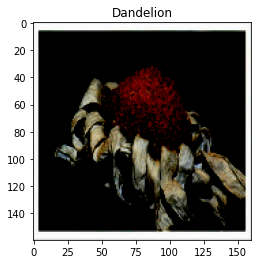

In [38]:
test_batches = test.batch(1)
for image, label in test_batches.take(1):
  pass
plt.imshow(np.squeeze(image))

plt.title("Dandelion" if model.predict(image) > 0 else "Daisy")